# Word2vec

### Kelimelerin Temsil Edilmesi
* Kelimeleri one-hot vektör olarak temsil edebiliriz.
* Kelime sayısıyla birlikte vektörlerin boyutu da artar.
* 10 bin kelime için 10 bin uzunluğunda vektör gerekir.


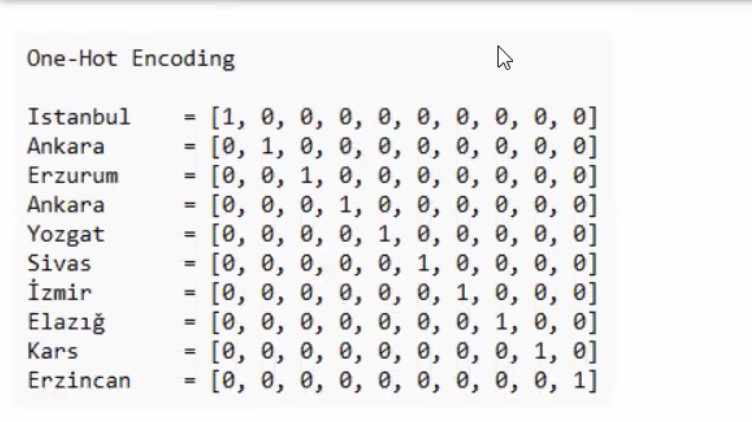

### Kelime Vektörleri (Word Vectors)

- Her kelime için birer vektöroluşturacağız.
- Vektörler kelimeler arasındaki anlamsal bilgileri saklar.
- Birbirine benzer kelimelerin vektörleri birbirine yakın olur.
- Kelime vektörü oluşturmak için kullanılan modern yöntemler : word2vec, GloVe

Not : Kelime vektörü, word vector, word embedding, embeding... aynı şeyler!

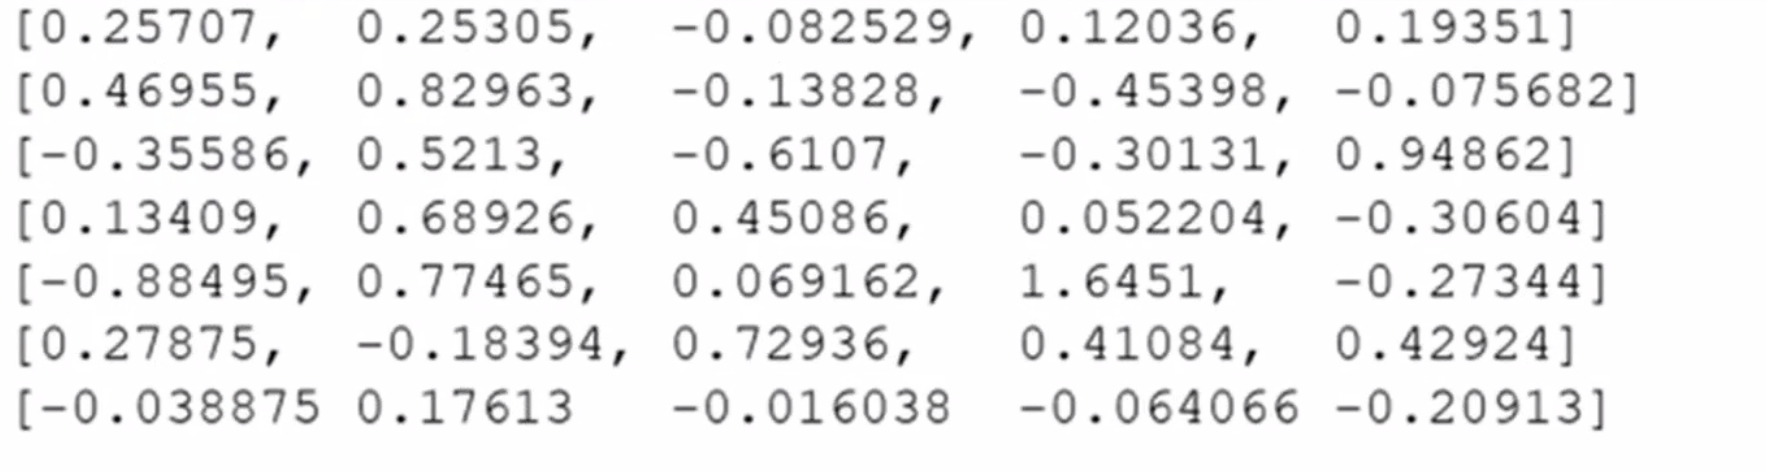

- Yukarıdaki vektörlere çevrilmiş veriler kelimelerin birbiri ile olan ilişkisini gösterir.
- Tüm bu vektörler birleştirilince bir embedding matrix elde ederiz.
- Kelime vektörü oluşturmak için kullanılabilecek bir çok yöntem/model var. Biz word2vec ve GloVe'a odaklanacağız.

#### Kelimelerin Birbiri ile Bağı

- Biz insanların bir kelimenin anlamını bilmesekte kelimenin cümle içerisindeki kullanımında göre anlam çıkartırız.
- Oluşturacağımız model bir kelimenin etrafındaki kelimelerden anlam çıkarabilirse kelimeyi **anlamaya yaklaşacaktır**.

"**Geçen gün kod yazarken çok pis faka bastım!**"
* Faka basmak : Oyuna getirilmek, tuzağa düşmek, hileye kanmak, adanmak, aldatılmak..

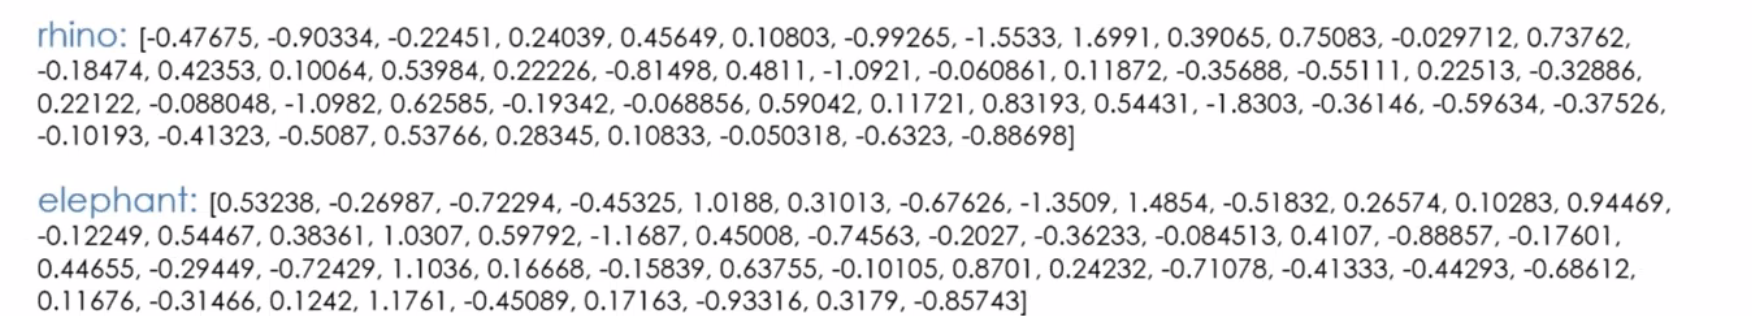

In [ ]:
#model.most_similar("rhino")

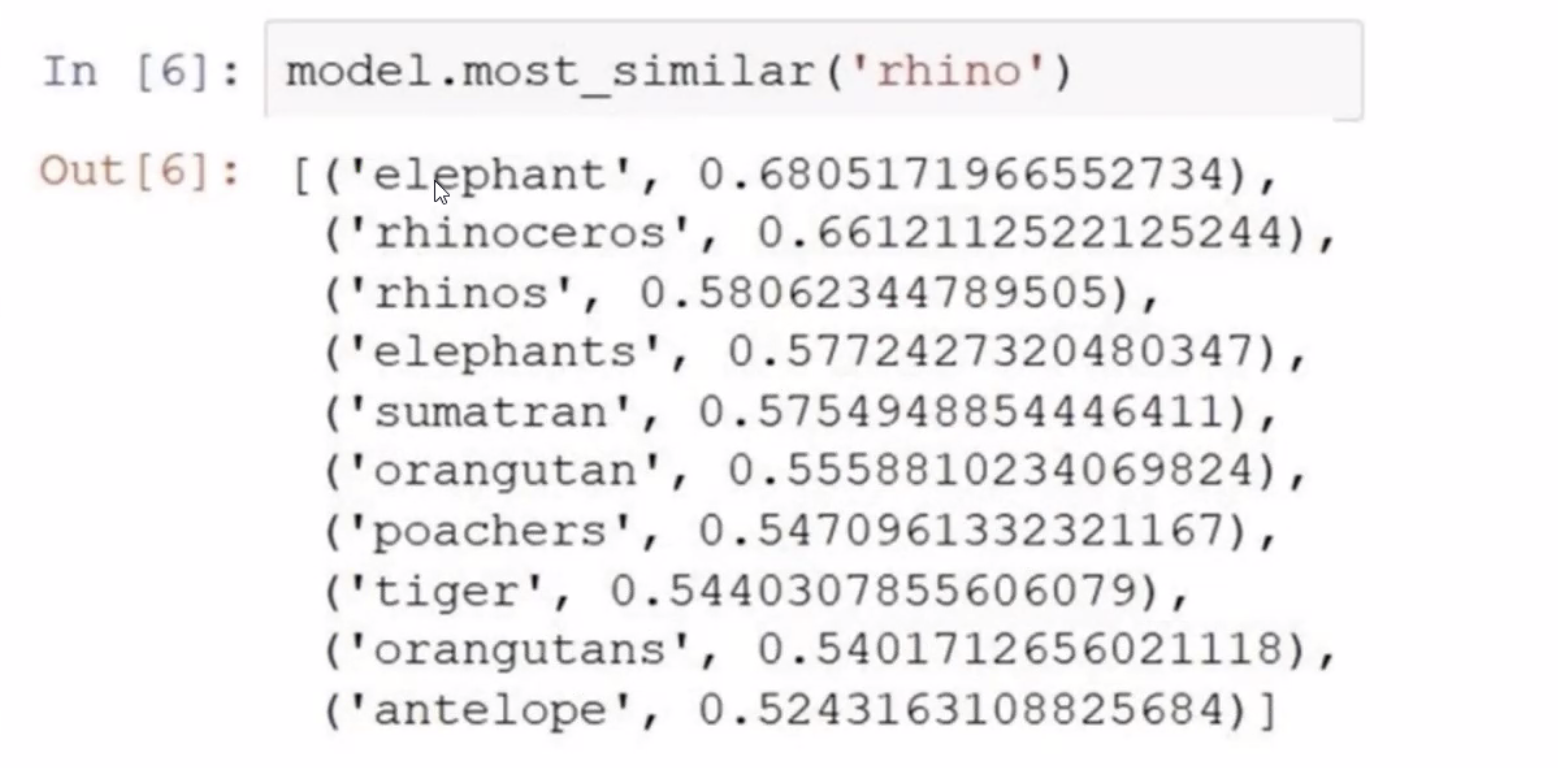

### Word2Vec
* Kenardaki kelimeler ortadaki kelimeyi temsil eder.
* 2013'de **Google** tarafından bulunan bir gözetimsiz öğrenme yöntemidir.

### Word2vec Algoritmaları

- **Skip-gram**
  - Ortadaki kelimelerden kenardaki kelimeleri tahmin eder.
- **Continious Bag of Words (CBOW)**
  - Kenardaki kelimelerden ortadaki kelimeyi tahmin eder.

### Skip-gram

- Ortadaki kelimeye göre kenardaki kelimeler tahmin edilir.
- Input : Orta kelime, Output : Kenardaki kelimeler
- Ortadaki kelimenin sağından ve solundan window(pencere) büyüklüğü kadar kelime tahmin edilir.
- Window büyüklüğü 2 ise sağdan ve soldan iki kelime dikkate alınır.

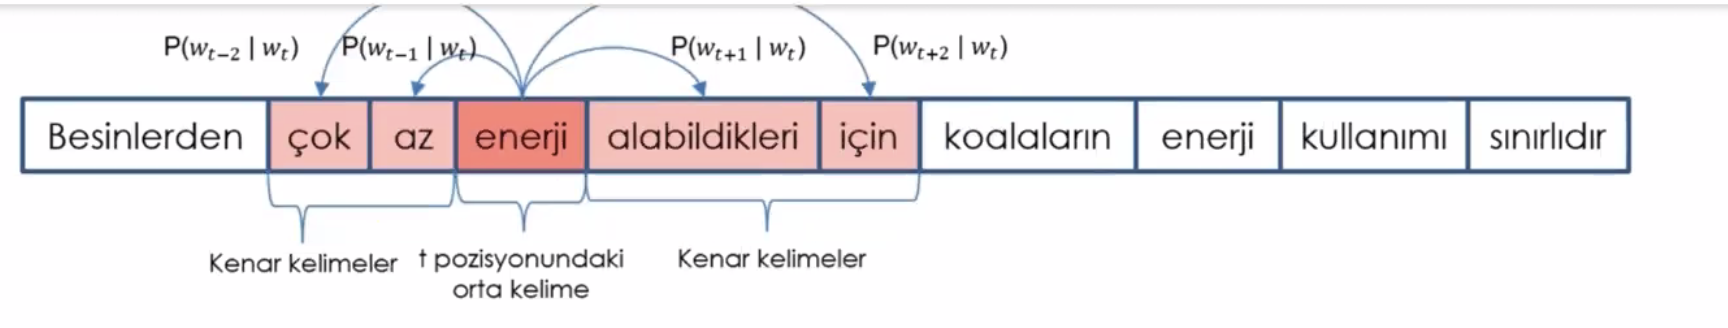

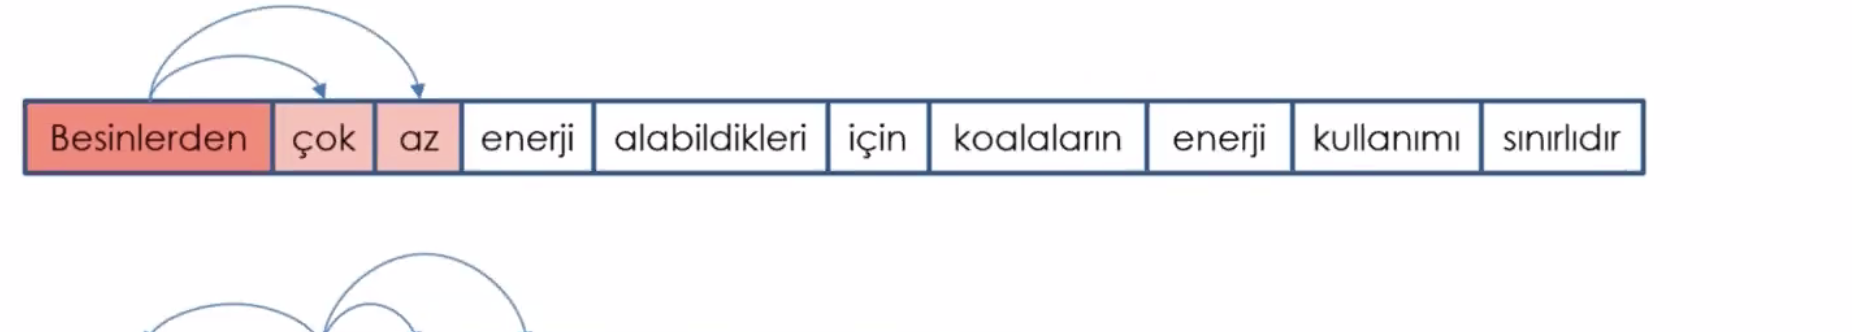

### CBOW Algoritması

- Kenardaki kelimelere göre ortadaki kelime tahmini yapar.
- Input : Kenardaki kelime, Output : orta kelime

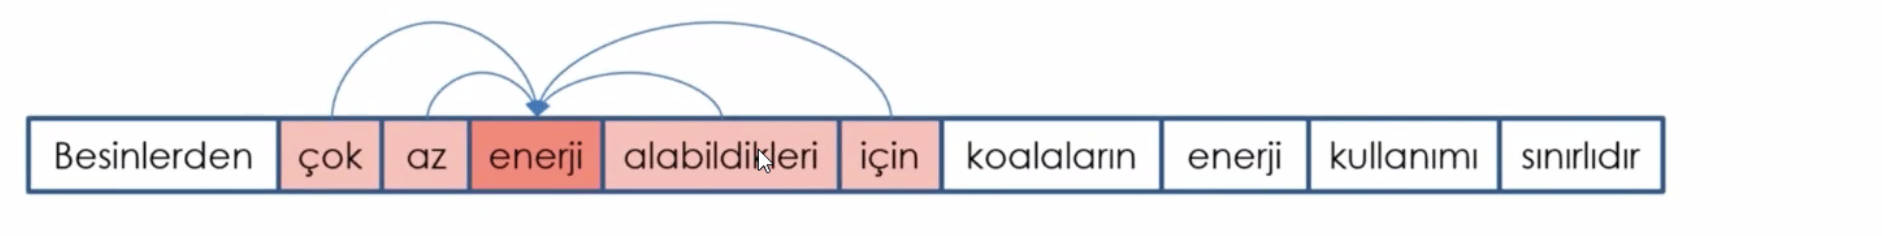

### Skip-gram Vs. CBOW

**Skip-Gram**
- CBOW'a göre küçük corpus'ta daha iyi sonuç verir.
- Nadir kelimeler daha iyi temsil edilir.
- CBOW'a göre daha yavaştır.

**CBOW**
- Eğitimi daha hızlı.
- Sık kullanılan kelimeleri daha iyi temsil edebilir.
- Daha büyük corpus'a ihtiyaç duar ve nadir kelimeleri temsil etmekte sıkıntı yaşayabilir.

## Negative Sampling
 - Bir kelimenin yanındaki kelimeleri tahmin etmek için modele öğretmek gerekiyor. Bu öğretme sırasında kelimelerin tahminini yapmak için kullanılabilecek activation function'lardan biri olan Softmax, corpus'umuzdaki olası kelimelerin tamamını tahmin için kullanmaya çalışır. Bu da tahmin performansını ciddi oranda düşürür.

 - Softmax ile sorun olan bu tahmini daha verimli hale getirmek için Sigmoid kullanırız. Bu işlemde corpus'daki veriler arasında bizim belirlediğimiz sayıda rastgele kelimeler seçerek tahmin yapılmasını sağlar.
  - Rastgele seçilen kelimeer **unigram distrubution** ile alınır. Corpus'ta sık geçen kelimelerden seçim yapılır. Ek olarak her zaman çok sık geçen kelimeler alınmasın, arada nadir geçen kelimeler de alınabilsin diye ayrca bir algoritma uygulanır.

Bu sürece/işleme **Nagative Sampling** denir.

In [ ]:
import nltk

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
f = open("gaste.txt", "r", encoding="utf8")
text = f.read()
t_list = text.split("\n")

corpus = []

for cumle in t_list:
  corpus.append(cumle.split())

In [ ]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [ ]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)

# size = 100      -> Kelime vektörlerimiz(vektör uzunluğu) 100 elemandan oluşacak.
# window = 5      -> Kelimenin sağından ve solundan 5'er kelime dikkate alınacak.
# min_count = 5   -> Corpus'ta en az 5'er dafe geçen kelimeleri al.
# sg = 1          -> Skip-gram algoritmasının kullanılacağını belirttik.
                    # Default olaran CBOW algoritması kullanılır.

In [ ]:
model.wv["istanbul"]      #istanbul kelimesinin vektörünü getir.
#wv -> Word Vektor

array([-0.15071607, -0.00835515,  0.08039355,  0.0678356 ,  0.8585732 ,
       -0.22371936, -0.251921  ,  0.36774626, -0.22914046, -0.39014542,
       -0.52962065, -0.3873024 ,  0.2283082 , -0.33951023, -0.2963373 ,
        0.2746214 ,  0.01424232, -0.39871988,  0.28581074, -0.52782756,
       -0.27350822, -0.32733512,  0.41415203, -0.3566973 , -0.33295077,
        0.20852724, -0.73464686,  0.06867276, -0.2967801 ,  0.54247683,
        0.4475732 , -0.37139428, -0.23586406, -0.29547453, -0.0201776 ,
        0.2333441 , -0.13667332, -0.12277181,  0.30444083, -0.64565766,
        0.25516078,  0.03701395,  0.30012968,  0.12162579,  0.25123915,
        0.12507361, -0.01221747,  0.00203471,  0.37102798, -0.07730167,
        0.2807666 ,  0.29567647, -0.13347188, -0.02649716, -0.60089725,
        0.44854853, -0.18489917, -0.1807666 , -0.63740015, -0.4123051 ,
       -0.23465645, -0.03002193, -0.31547758,  0.00549259, -0.04140091,
       -0.19950938, -0.3675721 ,  0.3402358 , -0.05409892, -0.19

In [ ]:
model.wv["iran"]

array([-0.27726948, -0.8649534 , -0.09707937,  0.7806949 , -0.23109338,
       -0.61981237, -0.4996917 ,  0.57182026, -0.19564603,  0.307474  ,
        0.13153373, -0.18020765, -0.5160898 ,  0.45596012,  0.31738743,
        0.58687395,  0.00980069,  0.33396032,  0.42500347, -0.7322708 ,
       -0.2434525 ,  0.53126216,  0.07630969, -0.35646126,  0.07762077,
        0.29428136, -1.1903957 , -0.5297331 , -0.48403338,  0.4048504 ,
       -0.12521183,  0.20370919,  0.564347  , -0.10538067, -0.30884776,
        0.22586592, -0.29647905,  0.06063082,  0.00904479, -0.11413088,
       -0.03755797, -0.37042475,  0.24996121, -0.30161965, -0.24132624,
       -0.01432053, -0.08801907, -0.38448787,  0.38272953,  0.17927112,
        0.51519996, -0.156436  ,  0.14597632, -0.03019125,  0.01846326,
       -0.0471814 ,  0.41677484, -0.32555005, -0.31691554, -0.07088312,
        0.11456306,  0.464792  , -0.42959568, -0.12218036,  0.24283169,
        0.550063  , -0.24449702,  0.64664197, -0.22405782,  0.10

In [ ]:
model.wv.most_similar("facebook")

[('twitter', 0.8115385174751282),
 ('paylaşım', 0.8037187457084656),
 ('hesabında', 0.7759880423545837),
 ('sayfasına', 0.7745023965835571),
 ('hesabından', 0.7574073672294617),
 ('whatsapp', 0.7446548342704773),
 ('ınstagram', 0.7302674055099487),
 ('sitesi', 0.7275703549385071),
 ('youtube', 0.725360631942749),
 ('hesabı', 0.7223846912384033)]

In [ ]:
model.wv.most_similar("perşembe")

[('pazartesi', 0.9284440279006958),
 ('cumartesi', 0.9269771575927734),
 ('salı', 0.917171061038971),
 ('çarşamba', 0.912668764591217),
 ('günü', 0.9036094546318054),
 ('cuma', 0.9015239477157593),
 ('akşamı', 0.8784953951835632),
 ('pazar', 0.8469266295433044),
 ('sabahı', 0.8362058401107788),
 ('gecesi', 0.7787784337997437)]

In [ ]:
model.wv.most_similar("salı")

[('pazartesi', 0.9177599549293518),
 ('perşembe', 0.9171711206436157),
 ('cumartesi', 0.9069165587425232),
 ('çarşamba', 0.9031108021736145),
 ('günü', 0.8860272765159607),
 ('cuma', 0.8776997923851013),
 ('akşamı', 0.8480413556098938),
 ('sabahı', 0.8282567262649536),
 ('pazar', 0.8061323761940002),
 ('haziranda', 0.7554425001144409)]

In [ ]:
model.wv.most_similar("almanya")

[('avusturya', 0.798954963684082),
 ('hollanda', 0.7676183581352234),
 ('bavyera', 0.7439609169960022),
 ('danimarka', 0.7290957570075989),
 ('fransa', 0.7252305150032043),
 ('belçika', 0.7183096408843994),
 ('saksonya', 0.6795254945755005),
 ('finlandiya', 0.672164797782898),
 ('alman', 0.6715905666351318),
 ('letonya', 0.6644705533981323)]

In [ ]:
model.wv.most_similar("ingiltere")

[('galler', 0.6831701397895813),
 ('brunei', 0.6607164740562439),
 ('finlandiya', 0.6583881974220276),
 ('isviçre', 0.6528773903846741),
 ('bae', 0.6415424346923828),
 ('türkiye', 0.632861852645874),
 ('ingiliz', 0.6326387524604797),
 ('dublin', 0.6307838559150696),
 ('cameron', 0.629657506942749),
 ('may', 0.6295885443687439)]

In [ ]:
model.save("wv.model")

In [ ]:
modelx = Word2Vec.load("wv.model")

In [ ]:
# Verdiğimiz Kelimeye Yakın Olan Kelimeleri Grafikte Göster

def closest_words(model, word):
  word_vectors = np.empty((0,100))    # Kelime vektörlerinin uzunluğu 100 olduğu için..
  word_labels = [word]                # Kelimeleri saklamak için...

  close_words = model.wv.most_similar(word)

  word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
                    # axis=0  : Eklenen kelime vektörü düzleştirilmesin diye 0 verdik.
                              # Tüm kelime vektörlerinin ayrı ayrı matrix'lerde tutulmasını sağlar.

  for w, _ in close_words:
    word_labels.append(w)   # w -> kelime
    word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)

  tsne = TSNE(random_state=0, perplexity=5)
  Y = tsne.fit_transform(word_vectors)    #TSNE'i vektör üzerine uygular.
  # TSNE ile görselleştirme için koordinatları aldık. (Y)

  x_coords = Y[:,0]
  y_coords = Y[:,1]

  plt.scatter(x_coords, y_coords)

  for label, x,y in zip(word_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x,y), xytext=(5,-2), textcoords="offset points")

plt.show()

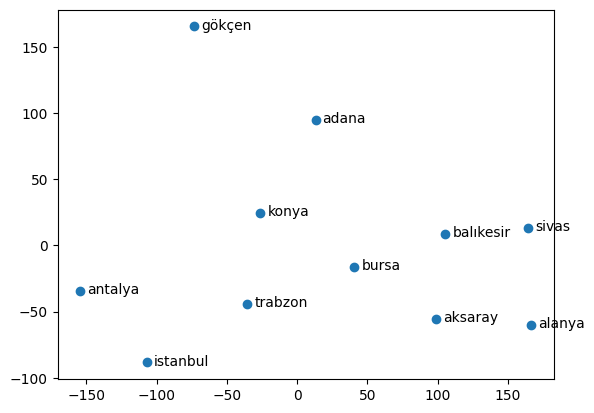

In [ ]:
closest_words(modelx, "istanbul")

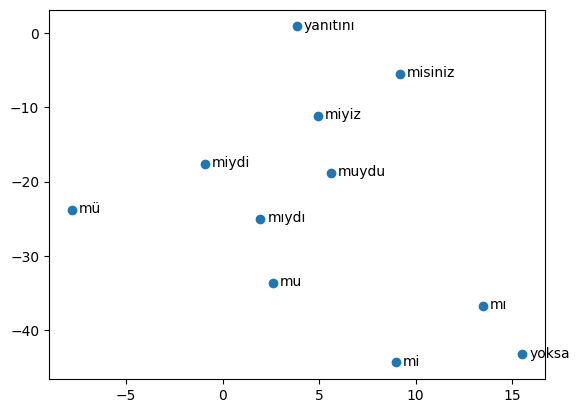

In [ ]:
closest_words(modelx, "mu")

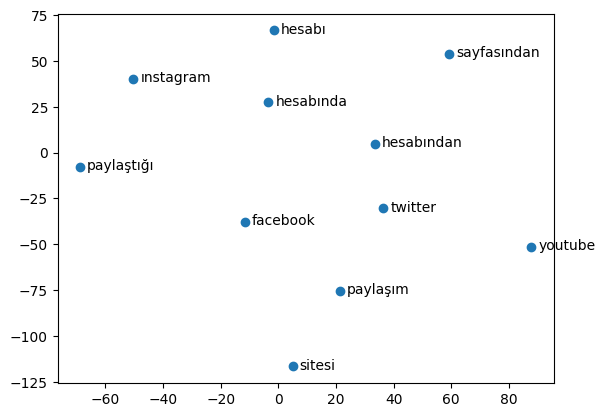

In [ ]:
closest_words(modelx, "twitter")